# Description

In this module, the plot of error in prediction is obtained for the north bound as well as the south bound direction. 

In [1]:
from pymongo import     MongoClient
import math
import pprint
#import geocoder
import pprint
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def PredictionError_NorthBound(BusStopsCount, TripStartTime, Bound, ResultPathDir, ResultPathDir_Np, UseMongoDB):
    '''
    input: The bus-stop count, trip start time, direction, and directory path of result folder
    output: None
    function: It extracts the prediction records from the MongoDB database and computes the 
    prediction error for different bus-stops of the route on the north bound direction.
    '''
    PredictionErrorAggAtIDListMean =[]
    PredictionErrorAggAtIDListSTD =[]
    PredictionErrorAggAtIDListMax =[]

    PredictionIndexList =[]
    
    if UseMongoDB==True:
        PredictionErrorLists = [record for record in 
                                con[RouteName]['PredictionErrorForSubStopsV2.'+TripStartTime+'.'+Bound].find()]
    
    else:
        PredictionErrorLists = np.load(f'{ResultPathDir_Np}/{RouteName}/PredictionErrorForSubStopsV2.{TripStartTime}.{Bound}.npy',
                                       allow_pickle=True)
    
    for BusStopIndex in range(BusStopsCount):
        PredictionErrorList = [rec for rec in PredictionErrorLists if rec['id']==BusStopIndex]

        if len(PredictionErrorList)!=0:
            if(PredictionErrorList[0]['PredictionAvailable']==True):
                #MeanPredictionErrorMean,STDPredictionErrorMean,MaxPredictionErrorMean=PredictionErrorAtIDNorth(BusStopIndex,TripStartTime,Bound)

                PredictionErrorAggAtIDListMean.append(PredictionErrorList[0]['PredictionErrorAggregateMean']/1000)
                PredictionErrorAggAtIDListSTD.append(PredictionErrorList[0]['PredictionErrorAggregateSTD']/1000)
                #PredictionErrorAggAtIDListMax.append(PredictionErrorList[0]['PredictionErrorAggregateMax']/1000)
                PredictionErrorAggAtIDListMax.append(PredictionErrorList[0]['PredictionErrorAggregateNinetyPercentileValue']/1000)
                PredictionIndexList.append(BusStopIndex)


    # In[18]:


    yticksList = [0,100,200,300,400,500,600,700]
    xticksList = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
    xticksLabel = ['B1','B2','B3','B4','B5','B6','B7','M1','M2','M3','M4','M5','M6','M7','B8']
    xLimit=(-0.8,15)

    # In[20]:

    ax1 = plt.subplot(1,1,1)
    ax1.set_xlim(xLimit)

    ax1.bar(PredictionIndexList,PredictionErrorAggAtIDListMean,1/(2*2),yerr = [np.zeros(BusStopsCount-1),PredictionErrorAggAtIDListSTD],hatch='oooo',label='Mean error',edgecolor='k',facecolor='None',capsize=2)
    PredictionIndexList[:]=[x+1/4 for x in PredictionIndexList]
    ax1.bar(PredictionIndexList,PredictionErrorAggAtIDListMax,1/(2*2),hatch='xxxx',label='Ninety percentile error',edgecolor='k',facecolor='None')
    plt.legend(fontsize=11)
    plt.yticks(yticksList)
    plt.xticks(xticksList,xticksLabel)
    plt.xlabel('Bus stops',fontsize=12)
    plt.ylabel('Prediction error (seconds)',fontsize=12)
    #plt.title('Prediction error v/s bus stop')


    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.tick_params(axis='both', which='minor', labelsize=10)

    plt.tight_layout()

    plt.savefig(f'{ResultPathDir}PredictionError_NorthBound.png',format='png',dpi=600)
    plt.show()


In [3]:
def PredictionError_SouthBound(BusStopsCount, TripStartTime, Bound, ResultPathDir, ResultPathDir_Np, UseMongoDB):
    '''
    input: The bus-stop count, trip start time, direction, and directory path of result folder
    output: None
    function: It extracts the prediction records from the MongoDB database and computes the 
    prediction error for different bus-stops of the route on the south bound direction.
    '''
    PredictionErrorAggAtIDListMean =[]
    PredictionErrorAggAtIDListSTD =[]
    PredictionErrorAggAtIDListMax =[]

    PredictionIndexList =[]
    
    if UseMongoDB==True:
        PredictionErrorLists = [record for record in 
                                con[RouteName]['PredictionErrorForSubStopsV2.'+TripStartTime+'.'+Bound].find()]
    
    else:
        PredictionErrorLists = np.load(f'{ResultPathDir_Np}/{RouteName}/PredictionErrorForSubStopsV2.{TripStartTime}.{Bound}.npy',
                                       allow_pickle=True)    

    for BusStopIndex in range(BusStopsCount):
        PredictionErrorList = [rec for rec in PredictionErrorLists if rec['id']==BusStopIndex]
        
        
        if len(PredictionErrorList)!=0:
            if(PredictionErrorList[0]['PredictionAvailable']==True):
                #MeanPredictionErrorMean,STDPredictionErrorMean,MaxPredictionErrorMean=PredictionErrorAtIDNorth(BusStopIndex,TripStartTime,Bound)

                PredictionErrorAggAtIDListMean.append(PredictionErrorList[0]['PredictionErrorAggregateMean']/1000)
                PredictionErrorAggAtIDListSTD.append(PredictionErrorList[0]['PredictionErrorAggregateSTD']/1000)
                #PredictionErrorAggAtIDListMax.append(PredictionErrorList[0]['PredictionErrorAggregateMax']/1000)
                PredictionErrorAggAtIDListMax.append(PredictionErrorList[0]['PredictionErrorAggregateNinetyPercentileValue']/1000)
                PredictionIndexList.append(BusStopIndex)

    yticksList = [0,100,200,300,400,500,600,700]
    xticksList = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
    xticksLabel = ['B1','B2','B3','B4','B5','B6','B7','M1','M2','M3','M4','M5','M6','M7','B8']
    xLimit=(-0.8,15)
    
    # In[23]:

    ax1=plt.subplot(1,1,1)
    ax1.set_xlim(xLimit)

    plt.bar(PredictionIndexList,PredictionErrorAggAtIDListMean,1/(2*2),yerr = [(0,0,0,0,0,0,0,0,0,0,0,0,0,0),PredictionErrorAggAtIDListSTD],hatch='oooo',label='Mean error',edgecolor='k',facecolor='None',capsize=2)
    PredictionIndexList[:]=[x+1/4 for x in PredictionIndexList]
    plt.bar(PredictionIndexList,PredictionErrorAggAtIDListMax,1/(2*2),hatch='xxxx',label='Ninety percentile error',edgecolor='k',facecolor='None')
    plt.legend(fontsize=11)
    plt.yticks(yticksList)
    plt.xticks(xticksList,xticksLabel)
    plt.xlabel('Bus stops',fontsize=12)
    plt.ylabel('Prediction error (seconds)',fontsize=12)
    #plt.title('Prediction error v/s bus stop')

    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.tick_params(axis='both', which='minor', labelsize=10)

    plt.tight_layout()

    plt.savefig(f'{ResultPathDir}PredictionError_SouthBound.png',format='png',dpi=600)
    plt.show()


# Execution of the code

In [4]:
from pathlib import Path

'''For directory management'''
path = Path(os.getcwd())

OneLevelUpPath = path.parents[0]

RouteName='Git_ISCON_PDPU'

NpPathDir = os.path.join(str(OneLevelUpPath), 'data','NpData')

#ResultPathDir = os.path.join(os.getcwd(), 'Result','PredictionError','')
ResultPathDir = os.path.join(str(OneLevelUpPath), 'results','PredictionError','')

ResultPathDir_Np = os.path.join(str(OneLevelUpPath), 'results','NpData','')

In [5]:
'''
ProjectDataUsed = True
UsedPreTrained = False
UseMongoDB = True
'''
#'''
ProjectDataUsed = True
UsedPreTrained = True
UseMongoDB = False
#'''

In [6]:
con = MongoClient()

In [7]:
if UseMongoDB==True:
    TripStartTimeAggregate= [Tr['TripStartTimeBound'] for Tr in 
                             con [RouteName]['TripStartTimeAggregate'].find()]
    
    Bound = TripStartTimeAggregate[0][0][1]
    BusStopRecords = [rec for rec in con[RouteName][f'BusStops.{Bound}Bound'].find()]
    
else:
    TripStartTimeAggregate_Record = np.load(f'{NpPathDir}/{RouteName}/TripStartTimeAggregate.npy',
                                            allow_pickle=True)
    
    TripStartTimeAggregate = [rec['TripStartTimeBound'] for rec in TripStartTimeAggregate_Record]
    
    Bound = TripStartTimeAggregate[0][0][1]
    
    BusStopRecords = np.load(f'{NpPathDir}/{RouteName}/BusStops.{Bound}Bound.npy',
                             allow_pickle=True)
    
BusStopsCount = len(BusStopRecords)    
print('Bound, BusStopsCount', Bound, len (BusStopRecords))

Bound, BusStopsCount North 15


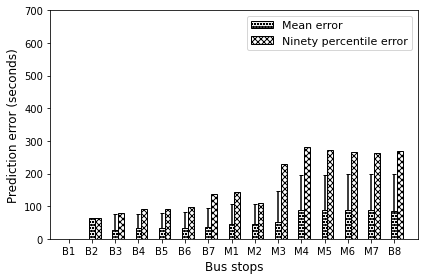

In [8]:
TripStartTime = TripStartTimeAggregate[0][0][0]
Bound = TripStartTimeAggregate[0][0][1]

PredictionError_NorthBound(BusStopsCount, TripStartTime, Bound, ResultPathDir, ResultPathDir_Np, UseMongoDB)

In [9]:
TripStartTime = TripStartTimeAggregate[0][1][0]
Bound = TripStartTimeAggregate[0][1][1]

if UseMongoDB==True:
    BusStopRecords = [rec for rec in con[RouteName][f'BusStops.{Bound}Bound'].find()]
    
else:
    BusStopRecords = np.load(f'{NpPathDir}/{RouteName}/BusStops.{Bound}Bound.npy',
                             allow_pickle=True)
    
BusStopsCount = len(BusStopRecords)    
print('StartHour, Bound, BusStopsCount', TripStartTime, Bound, len (BusStopRecords))

StartHour, Bound, BusStopsCount 18 South 15


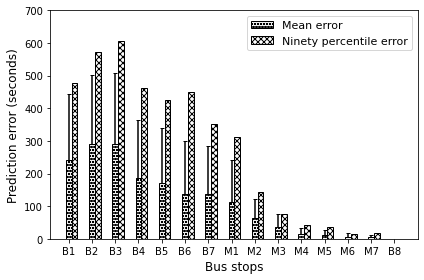

In [10]:
PredictionError_SouthBound(BusStopsCount, TripStartTime, Bound, ResultPathDir, ResultPathDir_Np, UseMongoDB)